In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
user_engagement_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [3]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
users_df = pd.read_csv("takehome_users.csv")

In [7]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
users_df.shape

(12000, 10)

In [10]:
users_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [12]:
user_engagement_df['date'] = user_engagement_df['time_stamp'].dt.date

<AxesSubplot:title={'center':'Activity per Day'}, xlabel='date'>

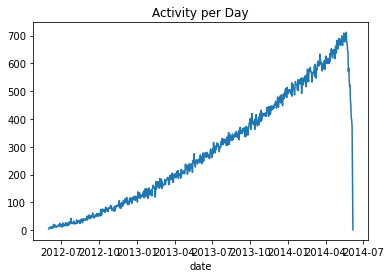

In [13]:
user_engagement_df.groupby(['date'])['user_id'].count().plot(title="Activity per Day")

In [14]:
user_engagement_df.groupby(['date'])['user_id'].count().max()

712

In [16]:
user_engagement_df[user_engagement_df['time_stamp'] >= '2014-06-06']

,time_stamp,user_id,visited,date
70763,2014-06-06 14:58:50,4051,1,2014-06-06


In [17]:
user_engagement_df.drop(user_engagement_df.index[70763], inplace=True)

In [18]:
user_visit_count = user_engagement_df.groupby(['user_id'])['visited'].sum().to_frame()

<AxesSubplot:title={'center':'Frequency of Number of Visits'}, ylabel='Frequency'>

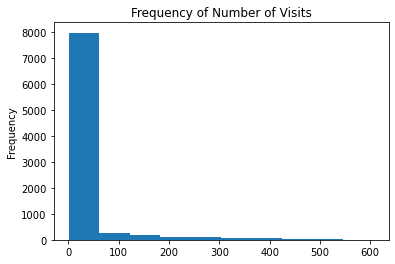

In [19]:
user_visit_count["visited"].plot(kind="hist", bins=10, title="Frequency of Number of Visits")

In [20]:
user_visit_count[user_visit_count["visited"] <= 20].groupby(['visited'])['visited'].count()

visited
1     6234
2      340
3      241
4      181
5      110
6       85
7       68
8       57
9       48
10      34
11      26
12      29
13      29
14      30
15      13
16      20
17      18
18      18
19      12
20      16
Name: visited, dtype: int64

In [21]:
print("Precentage of users who logged in once: "+"{:.1%}".format(6234/12000))
print("Precentage of users who never logged in: "+"{:.1%}".format(1-len(user_visit_count) / len(users_df)))
print("Users invited: ", 12000-5583)
print("Precentage of user invited: "+"{:.1%}".format(1-5583/12000))

Precentage of users who logged in once: 51.9%
Precentage of users who never logged in: 26.5%
Users invited:  6417
Precentage of user invited: 53.5%


In [22]:
engagement_weekly = user_engagement_df.groupby([pd.Grouper(key='time_stamp', freq='W'), 'user_id']).visited.sum().to_frame()

In [23]:
engagement_weekly.reset_index(inplace=True)

In [24]:
engagement_weekly.user_id[engagement_weekly.visited >= 3].nunique()

1445

In [25]:
adopted_users = engagement_weekly[engagement_weekly.visited >= 3].groupby(['user_id'])['visited'].sum().to_frame()

In [27]:
adopted_users['adopted'] = 1
adopted_users.head()

,visited,adopted
user_id,,
2,3,1
10,249,1
20,3,1
33,3,1
42,331,1


In [28]:
users_df['invited']= users_df['invited_by_user_id'].apply(lambda x: 0 if x == 0 else 1)

In [29]:
users_df = users_df.join(user_visit_count)

In [33]:
users_df["visited"] = users_df["visited"].fillna(0).astype(int)

In [34]:
users_df = users_df.join(adopted_users["adopted"])

In [35]:
users_df["adopted"] = users_df["adopted"].fillna(0).astype(int)

In [36]:
users_df['domain'] = users_df['email'].apply(lambda x: x.split('@')[1])

In [37]:
users_df.domain.value_counts().head()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
Name: domain, dtype: int64

In [38]:
list_of_domains = ["gmail.com", "yahoo.com", "jourrapide.com", "cuvox.de", "gustr.com", "hotmail.com"]

In [39]:
users_df['domains'] = users_df['domain'].apply(lambda x: x if x in list_of_domains else 'other')

In [40]:
users_df = pd.get_dummies(users_df, columns=['domains'])

In [41]:
users_df = pd.get_dummies(users_df, columns=['creation_source'])

In [42]:
df = users_df.drop(['creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'domain'], axis=1)

In [43]:
df.columns

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'invited', 'visited', 'adopted', 'domains_cuvox.de',
       'domains_gmail.com', 'domains_gustr.com', 'domains_hotmail.com',
       'domains_jourrapide.com', 'domains_other', 'domains_yahoo.com',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [45]:
y = df.adopted
X = df.drop(['adopted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=47)

In [47]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
logreg_scaled = pipeline.fit(X_train, y_train)

In [48]:
logreg_scaled.score(X_test, y_test)

0.9858333333333333

In [49]:
cross_val_score(logreg_scaled, X, y, cv=5)

array([0.98166667, 0.98583333, 0.98666667, 0.98375   , 0.9775    ])

In [50]:
features = list(X)

In [51]:
logreg = LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logreg.fit(X_train,y_train)
std_coef = logreg.coef_.reshape(-1,1).tolist()
feature_names = [feature.title() for feature in features]
coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
pd.set_option('display.max_rows', None)
print(coef_df)

                                        coef
Invited                            -2.492140
Domains_Gmail.Com                  -0.747046
Creation_Source_Personal_Projects  -0.683480
Creation_Source_Signup             -0.671392
Creation_Source_Guest_Invite       -0.606285
Visited                             0.541312
Domains_Hotmail.Com                -0.450263
Domains_Cuvox.De                   -0.439074
Creation_Source_Org_Invite         -0.403112
Domains_Yahoo.Com                  -0.393223
Enabled_For_Marketing_Drip         -0.262596
Opted_In_To_Mailing_List            0.247114
Domains_Other                      -0.228201
Domains_Jourrapide.Com             -0.192862
Creation_Source_Signup_Google_Auth -0.127871
Domains_Gustr.Com                  -0.041471
Org_Id                             -0.001501
Object_Id                          -0.000007


C:\Users\malak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
